# Round 1 Starts

In [66]:
import pandas as pd
import numpy as np

In [67]:
mdata = pd.read_csv('marketing_customer_analysis.csv')
mdata.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [68]:
#showing data frame shape 

mdata.shape
print("The dataframe shape is:", mdata.shape)

The dataframe shape is: (10910, 26)


In [69]:
# showing columns 

mdata.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [70]:
# lowercasing all header to standardise them

cols = []
for column in mdata.columns:
    cols.append(column.lower())
cols
mdata.columns = cols

mdata.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [71]:
#dropping the unnamed column

mdata = mdata.drop(['unnamed: 0'], axis=1)
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [118]:
mdata.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
month           

In [73]:
#showing categorical data types
mdata.select_dtypes(include=["object"])

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [74]:
#showing numerical data types

mdata.select_dtypes(include=['float64'])

,customer lifetime value,months since last claim,number of open complaints,total claim amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [75]:
#checking sum of null values in each column
mdata.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [76]:
#checking percentage of null values

round(mdata.isna().sum()/len(mdata),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(mdata.isna().sum()/len(mdata),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [77]:
# vehicle type has most null values, so we decided to delete this column
# for the rest of the columns we don't consider >6% to be a large number, so we decide to replace that with the mean where there are numerical columns 
# for the categorical columns, we will replace it with the mode value.

In [78]:
# vehicle type has most null values, so we decided to delete this column

mdata = mdata.drop(['vehicle type'], axis=1)
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [79]:
# for the rest of the columns we don't consider >6% to be a large number
# so we decide to replace that with the mean where there are numerical columns 

import numpy as np
mean_mslc = mdata['months since last claim'].mean()
mean_mslc
mdata['months since last claim'] = mdata['months since last claim'].fillna(mean_mslc)

 
mean_nooc = mdata['number of open complaints'].mean()
mean_nooc
mdata['number of open complaints'] = mdata['number of open complaints'].fillna(mean_nooc)


In [80]:
mdata.isna().sum()

customer                           0
state                            631
customer lifetime value            0
response                         631
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    622
vehicle size                     622
dtype: int64

In [81]:
# for the categorical columns, we will replace it with the most common value value. 
# replacing values for the column 'state'

mdata['state'].unique()
mdata['state'].value_counts()
display(mdata['state'].value_counts(dropna=False))



California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [82]:

mdata['state'] = mdata['state'].fillna('California')

mdata['state'].value_counts(dropna=False)

California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [83]:
# for the categorical columns, we will replace it with the most common value value. 
# replacing values for the column 'response'

mdata['response'].unique()
mdata['response'].value_counts()
display(mdata['response'].value_counts(dropna=False))


No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [84]:
mdata['response'] = mdata['response'].fillna('No')

mdata['response'].value_counts(dropna=False)

No     9444
Yes    1466
Name: response, dtype: int64

In [85]:

# for the categorical columns, we will replace it with the most common value value. 
# replacing values for the 'vehicle class'
mdata['vehicle class'].unique()
mdata['vehicle class'].value_counts()
display(mdata['vehicle class'].value_counts(dropna=False))

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [86]:
mdata['vehicle class'] = mdata['vehicle class'].fillna('Four-Door Car')

mdata['vehicle class'].value_counts(dropna=False)

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [87]:
mdata['vehicle size'].unique()
mdata['vehicle size'].value_counts()
display(mdata['vehicle size'].value_counts(dropna=False))

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

In [88]:
mdata['vehicle size'] = mdata['vehicle size'].fillna('Medsize')

mdata['vehicle size'].value_counts(dropna=False)

Medsize    7873
Small      1966
Large      1071
Name: vehicle size, dtype: int64

In [89]:
mdata.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [90]:
import datetime


mdata['effective to date']
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [91]:
pd.to_datetime(mdata['effective to date'], errors='coerce')
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [92]:
mdata['effective to date'][0]

'2/18/11'

In [93]:
mdata['month'] = pd.DatetimeIndex(mdata['effective to date']).month
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [94]:
#filtering!
mdata[mdata['month'] < 4]
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [95]:
mdata['month']

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64

In [63]:
# this confirms that all values are less than 4
print(mdata['month'].where(mdata['month'] > 3))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10905   NaN
10906   NaN
10907   NaN
10908   NaN
10909   NaN
Name: month, Length: 10910, dtype: float64


# Round 3 starts here

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [101]:
display(mdata.info)
mdata.head()

<bound method DataFrame.info of       customer       state  customer lifetime value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      education effective to date employmentstatus gender  income  ...  \
0    

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [103]:
mdata.describe()
mdata.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [108]:
summary = mdata.describe().T

def roundforme(x):
    return round(x,2)

for col in summary.columns:
    summary[col] = summary[col].apply(roundforme)

summary

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38
income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00
monthly premium auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00
months since last claim,10910.0,15.15,9.78,0.00,7.00,15.00,23.00,35.00
months since policy inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00
number of open complaints,10910.0,0.38,0.89,0.00,0.00,0.00,0.38,5.00
number of policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00
total claim amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24
month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00


In [111]:
#Show a plot of the total number of responses.

import matplotlib.pyplot as plt

mdata['response'].unique()
mdata['response'].value_counts()


No     9444
Yes    1466
Name: response, dtype: int64

<AxesSubplot:>

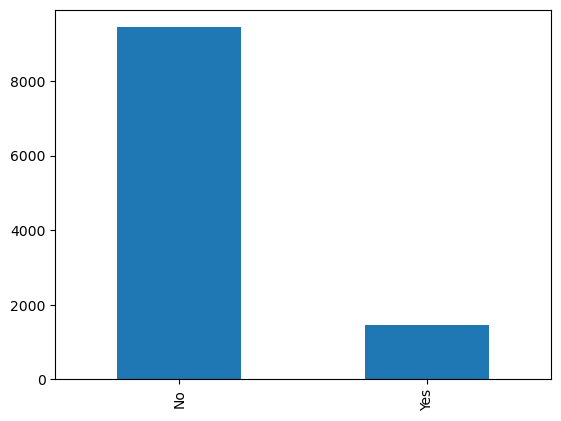

In [110]:
#Show a plot of the total number of responses.

mdata['response'].value_counts().plot(kind='bar')


In [113]:
#Show a plot of the response rate by the sales channel.

mdata['response rate'] = mdata['response'] == 'Yes'
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,False
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,False
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,False
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,True
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1,False


In [131]:
#forcing the response rate boolean to be a numeric value


mdata["response rate"]=  pd.to_numeric(mdata["response rate"], errors='coerce')
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1,0


In [132]:
mdata.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
month           

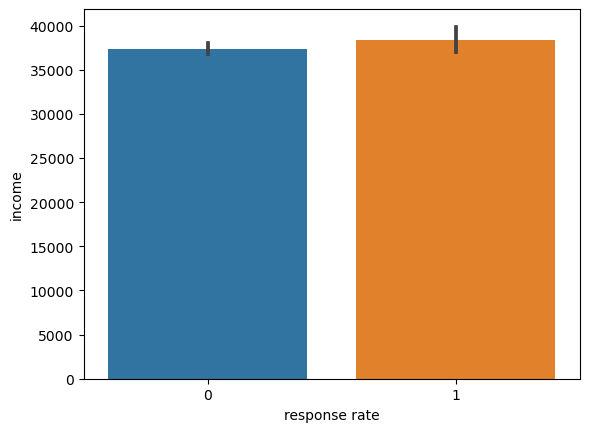

In [127]:
#Show a plot of the response rate by the sales channel.

import matplotlib.pyplot as plt
sns.barplot(x="response rate", y="income", data=mdata)
plt.show()

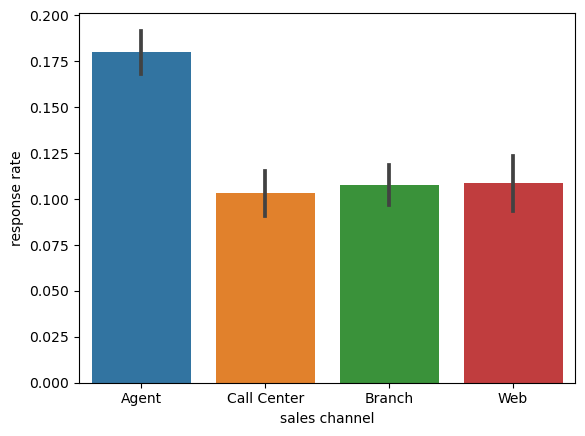

In [129]:
sns.barplot(x="sales channel", y="response rate", data=mdata)
plt.show()

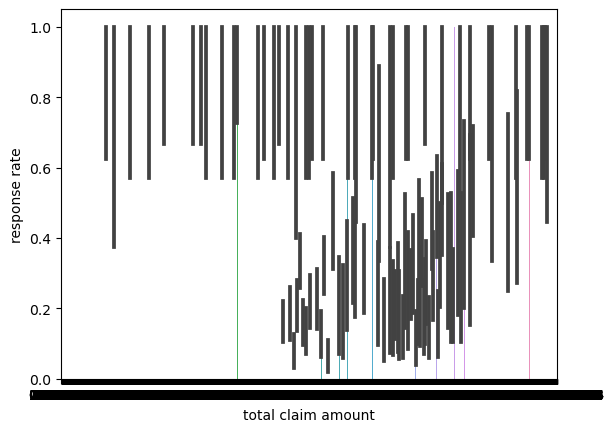

In [130]:
sns.barplot(x="total claim amount", y="response rate", data=mdata)
plt.show()